# 設定

In [52]:
from sklearn.datasets import load_iris
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#アイリスデータのインポート
iris_data = load_iris()
X = iris_data.data
Y = iris_data.target
data_names = ['sepal_length','sepal_width','petal_length','petal_width']
target_names = ['setosa', 'versicolor', 'virginica']
#print(type(X))
# print(type(target_names))

df_X = pd.DataFrame(X,columns = data_names)
df_Y = pd.DataFrame(Y,columns = ['Species'])

# print(df_X)
# print(df_Y)
# print(type(df_X))
X = df_X.values
X = X[50:150]
X = X[:,[2,3]]
# print(X)


Y = df_Y.values.T
Y = Y[ : ,50:150] - 1

# print(X.shape)
# print(Y)

(100, 2)


In [2]:
#初期パラメータ設定

num_iter: int = 100
lr: float = 0.000001
no_bias: bool = False
verbose : bool = True
lam : float = 0.01


In [3]:
#インスタンス変数の設定
def __init__(self, num_iter, lr, bias, verbose):
    # ハイパーパラメータを属性として記録
    self.iter = num_iter
    self.lr = lr
    self.bias = bias
    self.verbose = verbose
    # 損失を記録する配列を用意
    self.loss = np.zeros(self.iter)
    self.val_loss = np.zeros(self.iter)
    """
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

# 【問題1】仮定関数

In [4]:
np_x = X

np_1 = np.ones((np_x.shape[0],1)) # 行列の長さを自動取得する
if no_bias != True:
    np_x = np.concatenate([np_1, np_x], 1) # バイアス＝TRUEの時は下記をXとして扱う
else:
    pass
np.random.seed(0) #本来は与えられるパラメータベクトル
param_vec = np.random.uniform(0, 5, (1, np_x.shape[1]))


# print(np_x.shape[1])
# print(np_x.T.shape)
# print(param_vec.shape)

y_pred = 1/(1 + math.e**(-1*param_vec @ np_x.T))
y_pred.shape

(1, 100)

# 【問題2】最急降下法

In [5]:
stu = 0.0000000001

error = y_pred - Y

result = 0
result0 = result
print(result0)
# print(result0.shape)
# param_vec.shape
# result0[0] = result0[0] + 1
# print(result0)

result = (1 - stu*lam/X.shape[0])*result - stu/X.shape[0]*(error @ np_x).T

print(Y.shape)
print(error.shape)
print(result)

0
(1, 100)
(1, 100)
[[-4.99999999e-11]
 [-2.12999999e-10]
 [-6.62999998e-11]]


# 【問題3】推定

In [6]:
    def predict_proba(self, np_x):
        param_vec = np.random.uniform(0, 100, (1, np_x.shape[1]))
        y_pred = 1/(1 + math.e**(-1*param_vec @ np_x.T))
        
        pass
        return y_pred

In [7]:
    def predict(self, np_x):
        param_vec = np.random.uniform(0, 100, (1, np_x.shape[1]))
        y_pred = 1/(1 + math.e**(-1*param_vec @ np_x.T))
        y_pred_2d = y_pred.where(a < 0.5, 0, 1)
        pass
        return y_pred_2d

# 【問題4】目的関数

In [8]:
def loss_cal(y_pred , Y):
    """
    損失関数の計算と記録

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    cost : numpy.float
      平均二乗誤差
    """
    
    loss_1 = 1/X.shape[0]*(-1)*Y@np.log(y_pred.T)
    loss_2 = -1/X.shape[0]*(1 - Y)@np.log(1 - y_pred.T)
    l_2 = lam/2/X.shape[0]*result.T@result
    loss = loss_1 + loss_2 + l_2
    return loss

print()

loss_cal(y_pred , Y)


array([[10.98696123]])

In [9]:
print(y_pred.shape)
print(Y.shape)

(1, 100)
(1, 100)


# 【問題5】学習と推定

In [66]:
class ScratchLogisticRegression1():

    lam = 0.1
    no_bias: bool = True
        
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        self.X = X
        self.Y = y

        np_1 = np.ones((self.X.shape[0],1)) # 行列の長さを自動取得する
#         np_1_val = np.ones((self.np_x_val.shape[0],1))
        if no_bias != True:
            self.X = np.concatenate([np_1, self.X], 1) # バイアス＝TRUEの時は下記をXとして扱う
#             self.X_val = np.concatenate([np_1_val, self.np_x_val], 1)
        else:
            pass
        
        #パラメーターの初期値（平均０、分散１の正規分布）
#         print(self.X.shape)
        np.random.seed(0) #本来は与えられるパラメータベクトル
        self.coef_ =  np.random.uniform(0, 1, (1, self.X.shape[1]))
#         print(self.coef_)
        self.predict_proba(self.X)

        error = self.y_pred  - y
            
        for iter_count in range(self.iter):
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                pass
                #print("{}回目の学習".format(iter_count))
            
            # 過程関数
#             self.predict_proba(X)
#             self.predict(X)
# #             print(y.shape)
# #             print(self.y_pred.shape)
# #             y_pred_val = predict_proba(self, X_val)
#             # _linear_hypothesis　→　これだけでh0の更新、fit内部ではself.h0で更新後の値が呼び出せる、retunいらない
            
#             # 最急降下法（error算出→勾配算出）
#             error = self.y_pred - y

            self._gradient_descent(X, error)
            self.loss_cal(X, y)
            self.loss[iter_count] = self.loss_
#             self.val_loss[iter_count] = loss_cal(h0_val , y_val)
#             print(self.coef_)

        
    def predict_proba(self, X):
#         print(self.coef_.shape)
#         print(X.shape)
#         np_1 = np.ones((X.shape[0],1)) # 行列の長さを自動取得する
#         if no_bias != True:
#             X = np.concatenate([np_1, X], 1) # バイアス＝TRUEの時は下記をXとして扱う
#         print(X.shape)
        self.y_pred = 1/(1 + np.exp(-1*self.coef_ @ X.T))
#         print(X.T.shape)

    def predict_proba2(self, X):
#         print(self.coef_.shape)
#         print(X.shape)
        np_1 = np.ones((X.shape[0],1)) # 行列の長さを自動取得する
        if no_bias != True:
            X = np.concatenate([np_1, X], 1) # バイアス＝TRUEの時は下記をXとして扱う
#         print(X.shape)
        y_pred = 1/(1 + np.exp(-1*self.coef_ @ X.T))
#         print(X.T.shape)
        return y_pred


    def predict(self, X):
#         print(self.coef_)
#         print(X.T)
#         np_1 = np.ones((X.shape[0],1)) # 行列の長さを自動取得する
#         if no_bias != True:
#             X = np.concatenate([np_1, X], 1) # バイアス＝TRUEの時は下記をXとして扱う
        y_pred = 1/(1 + np.exp(-1*self.coef_ @ X.T))
        y_pred_2d = np.where(y_pred < 0.5, 0, 1)
        y_pred_2d = y_pred_2d
        return y_pred_2d
    
    def predict2(self, X):
#         print(self.coef_)
#         print(X.T)
        np_1 = np.ones((X.shape[0],1)) # 行列の長さを自動取得する
        if no_bias != True:
            X = np.concatenate([np_1, X], 1) # バイアス＝TRUEの時は下記をXとして扱う
        y_pred = 1/(1 + np.exp(-1*self.coef_ @ X.T))
        y_pred_2d = np.where(y_pred < 0.5, 0, 1)
        y_pred_2d = y_pred_2d
        return y_pred_2d
    
    def loss_cal(self, X, y):
        loss_1 = 1/X.shape[0]*(-1)*y@np.log(self.y_pred.T) #計算怪しい
        loss_2 = -1/X.shape[0]*(1 - y)@np.log(1 - self.y_pred.T) #計算怪しい
        l_2 = lam/2/X.shape[0]*(self.coef_@self.coef_.T)
#         print(l_2)
        self.loss_ = loss_1 + loss_2 + l_2
    
    def _gradient_descent(self, X, error):
        self.coef_ = (1 - self.lr*lam/self.X.shape[0])*self.coef_ - self.lr/self.X.shape[0]*(error @ self.X)

In [67]:
# 動作確認
from sklearn.model_selection import train_test_split
# ndarray変換
X_train, X_val, y_train, y_val = train_test_split(X, Y.T, test_size=0.25, random_state=0)
y_train = y_train.T
y_val = y_val.T
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
X.shape[0]

(75, 2)
(25, 2)
(1, 75)
(1, 25)


100

In [68]:
slrg = ScratchLogisticRegression1(num_iter = 100,lr = 0.1,bias = True,verbose = True)
slrg.fit(X_train, y_train, X_val, y_val)
# print(slrg.coef_)
# print(slrg.loss)
# print(X_train.shape)
slrg.predict_proba2(X_val)
slrg.predict2(X_val)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [69]:
y_val

array([[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0]])

In [47]:
print(X_val.shape)

(25, 2)


In [70]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import itertools

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),\
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i],\
                    label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i])
for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


学習結果0.9066666666666666
解析結果0.96


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


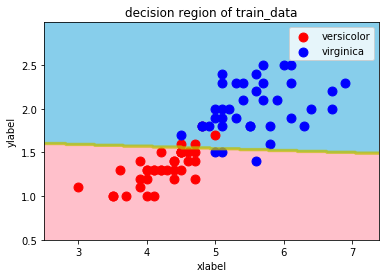

[[0.04403254 1.86380013]]


In [71]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train.T)
y_pred = clf.predict(X_val)
y_pred_train = clf.predict(X_train)
from sklearn import metrics
print("学習結果" + str(metrics.accuracy_score(y_train.T, y_pred_train)))
print("解析結果" + str(metrics.accuracy_score(y_val.T, y_pred)))
decision_region(X_train,list(itertools.chain.from_iterable(y_train.T)),clf,\
                title='decision region of train_data')
# decision_region(X_val,list(itertools.chain.from_iterable(y_val)),clf,\
#                 title='decision region of test_data')
print(clf.coef_)